<a href="https://colab.research.google.com/github/josewborba/portfolio/blob/main/transportation_app_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA performed for a technical interview for a transport App company.** Beside this notebook a slideshow was used. I recommend to see the presentantion before seeing the notebook. You can check the slideshow at: https://drive.google.com/file/d/1tPWsn8F5h9fCetOWrzQV35Rr_wpdWuuC/view?usp=sharing

Data was available in a RDS (Postgres).
*I deleted the conection information due to security.*

This notebook sctructure is:

1.   Database connection
2.   Merging tables
3.   1-6 questions that suppose to be answered through the EDA
4.   2 situations that i'm free to choose best information to help the stakeholder take decision

Specially in the part 4. i recommend seeing the presentation. Beside the information gathered here, at the slideshow I have some logical and suggestions




In [ ]:
#first, install psycopg2

# pip install psycopg2

In [ ]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
import numpy as np

# Conecting and ingesting the data

In [ ]:
DB_HOST = 'XXX'
DB_NAME = 'postgres'
DB_USER = 'candidate'
DB_PASS = 'XXX'

In [ ]:
conn = psycopg2.connect(dbname=DB_NAME, user=DB_USER, password=DB_PASS, host=DB_HOST)

In [ ]:
cur = conn.cursor()

In [ ]:
trip = pd.read_sql("SELECT * FROM trip", con=conn)

In [ ]:
calendar = pd.read_sql("SELECT * FROM calendar", con=conn)

In [ ]:
passenger = pd.read_sql("SELECT * FROM passenger", con=conn)

In [ ]:
city = pd.read_sql("SELECT * FROM city", con=conn)

# First view of the datasets

In [ ]:
trip.head()

,id,driver_id,passenger_id,city_id,call_time,finish_time,surge_rate,trip_distance,trip_fare
0,48d284eb,e3e77255,c01d24da,43006,2019-09-22 02:06:34,2019-09-22 02:16:07,0.0,2.43,3.53
1,48d28bca,e3becca9,0c923977,43050,2019-09-14 09:24:49,2019-09-14 09:40:44,0.9,3.09,7.51
2,48d2a250,1ac10a75,1558e026,43278,2019-08-22 15:52:24,2019-08-22 16:04:39,0.0,3.51,4.49
3,48d2a2f2,bd4b97da,28083bb2,43116,2019-05-31 20:07:11,2019-05-31 20:54:29,0.0,31.70,29.24
4,48d2b928,e49d3c61,0d1f049d,43278,2019-05-27 23:43:37,2019-05-27 23:55:00,0.0,3.43,2.26


In [ ]:
calendar.head()

,id,calendar_date,week_day,holiday
0,46724,2018-01-01,Monday,1
1,46725,2018-01-02,Tuesday,0
2,46726,2018-01-03,Wednesday,0
3,46727,2018-01-04,Thursday,0
4,46728,2018-01-05,Friday,0


In [ ]:
passenger.head()

,id,first_call_time
0,00000fab,2019-05-11 20:23:54
1,0000149d,2018-12-24 21:21:33
2,00002b66,2018-09-20 21:08:24
3,00002bc7,2019-07-28 11:27:56
4,0000332e,2019-02-21 23:34:24


In [ ]:
city.head()

,id,name
0,42868,Mordor
1,42948,Erebor
2,43006,Minas Tirith
3,43020,Isengard
4,43050,Gondor


In [ ]:
trip.info

<bound method DataFrame.info of                id driver_id passenger_id city_id           call_time  \
0        48d284eb  e3e77255     c01d24da   43006 2019-09-22 02:06:34   
1        48d28bca  e3becca9     0c923977   43050 2019-09-14 09:24:49   
2        48d2a250  1ac10a75     1558e026   43278 2019-08-22 15:52:24   
3        48d2a2f2  bd4b97da     28083bb2   43116 2019-05-31 20:07:11   
4        48d2b928  e49d3c61     0d1f049d   43278 2019-05-27 23:43:37   
...           ...       ...          ...     ...                 ...   
2318352  48d232df  2d805a81     567d3c4d   43006 2019-07-30 18:29:16   
2318353  48d238f0  2b929b5d     781d3df6   43020 2019-06-15 06:53:09   
2318354  48d24f90  3683c68e     92d94f20   43050 2019-05-27 07:07:05   
2318355  48d25216  0c154c23     2fc0d4cf   43179 2019-05-25 05:06:57   
2318356  48d27697  2d77aca0     f8b29160   43278 2019-05-15 05:02:34   

                finish_time  surge_rate  trip_distance  trip_fare  
0       2019-09-22 02:16:07        

In [ ]:
trip.describe()

,surge_rate,trip_distance,trip_fare
count,2.318351e+06,2.295118e+06,2.318357e+06
mean,4.524211e-02,6.287275e+00,5.250823e+00
std,1.595359e-01,5.603102e+00,4.168291e+00
min,-1.000000e+00,-5.000000e-01,0.000000e+00
25%,0.000000e+00,2.580000e+00,2.740000e+00
50%,0.000000e+00,4.600000e+00,4.030000e+00
75%,0.000000e+00,8.280000e+00,6.470000e+00
max,4.000000e+00,2.961000e+02,1.234320e+03


# Merging all the data into one big table 

creating a column date to make the merge

In [ ]:
trip['date'] = pd.to_datetime(trip['call_time']).dt.date
trip.head()

,id,driver_id,passenger_id,city_id,call_time,finish_time,surge_rate,trip_distance,trip_fare,date
0,48d284eb,e3e77255,c01d24da,43006,2019-09-22 02:06:34,2019-09-22 02:16:07,0.0,2.43,3.53,2019-09-22
1,48d28bca,e3becca9,0c923977,43050,2019-09-14 09:24:49,2019-09-14 09:40:44,0.9,3.09,7.51,2019-09-14
2,48d2a250,1ac10a75,1558e026,43278,2019-08-22 15:52:24,2019-08-22 16:04:39,0.0,3.51,4.49,2019-08-22
3,48d2a2f2,bd4b97da,28083bb2,43116,2019-05-31 20:07:11,2019-05-31 20:54:29,0.0,31.70,29.24,2019-05-31
4,48d2b928,e49d3c61,0d1f049d,43278,2019-05-27 23:43:37,2019-05-27 23:55:00,0.0,3.43,2.26,2019-05-27


In [ ]:
trip_calendar = trip.merge(calendar, left_on='date', right_on='calendar_date', suffixes=['_trip','_calendar'])

In [ ]:
trip_calendar.head()

,id_trip,driver_id,passenger_id,city_id,call_time,finish_time,surge_rate,trip_distance,trip_fare,date,id_calendar,calendar_date,week_day,holiday
0,48d284eb,e3e77255,c01d24da,43006,2019-09-22 02:06:34,2019-09-22 02:16:07,0.0,2.43,3.53,2019-09-22,47353,2019-09-22,Sunday,0
1,48db48cf,ce2f0103,ae86a696,43006,2019-09-22 09:20:50,2019-09-22 09:31:24,0.0,3.46,2.06,2019-09-22,47353,2019-09-22,Sunday,0
2,48e0bfe0,8f9192dd,67eeb6b0,43179,2019-09-22 23:37:27,2019-09-22 23:59:41,0.0,10.59,8.33,2019-09-22,47353,2019-09-22,Sunday,0
3,48e2ca3b,80ee3fb4,3f096463,43020,2019-09-22 08:08:07,2019-09-22 08:30:28,0.0,10.64,7.90,2019-09-22,47353,2019-09-22,Sunday,0
4,48eb603b,80d935ed,77863390,43179,2019-09-22 16:05:14,2019-09-22 16:18:20,0.3,1.31,3.79,2019-09-22,47353,2019-09-22,Sunday,0


In [ ]:
trip_calendar_passenger = trip_calendar.merge(passenger, left_on='passenger_id', right_on='id',how='inner', suffixes=['_trip_calendar','_passenger'])

In [ ]:
trip_calendar_passenger.head()

,id_trip,driver_id,passenger_id,city_id,call_time,finish_time,surge_rate,trip_distance,trip_fare,date,id_calendar,calendar_date,week_day,holiday,id,first_call_time
0,48d284eb,e3e77255,c01d24da,43006,2019-09-22 02:06:34,2019-09-22 02:16:07,0.0,2.43,3.53,2019-09-22,47353,2019-09-22,Sunday,0,c01d24da,2018-09-22 20:04:43
1,8bd39604,b199e84a,c01d24da,43006,2019-09-22 01:48:39,2019-09-22 02:00:38,0.0,2.22,1.80,2019-09-22,47353,2019-09-22,Sunday,0,c01d24da,2018-09-22 20:04:43
2,b03cd256,bf367601,c01d24da,43006,2019-09-12 05:38:07,2019-09-12 05:46:14,0.1,2.85,4.03,2019-09-12,47343,2019-09-12,Thursday,0,c01d24da,2018-09-22 20:04:43
3,b394dfb7,cb37f75b,c01d24da,43006,2019-09-20 02:28:14,2019-09-20 02:43:11,0.0,5.40,5.65,2019-09-20,47351,2019-09-20,Friday,0,c01d24da,2018-09-22 20:04:43
4,5232ed7c,4bb1a12a,c01d24da,43006,2019-08-31 08:34:16,2019-08-31 09:00:52,0.0,2.26,3.50,2019-08-31,47331,2019-08-31,Saturday,0,c01d24da,2018-09-22 20:04:43


In [ ]:
trip_calendar_passenger['city_id'] = trip_calendar_passenger['city_id'].astype(int)
city['id'] = city['id'].astype(int)

In [ ]:
trip_calendar_passenger_city = trip_calendar_passenger.merge(city, left_on='city_id',right_on='id', how='inner', suffixes=['_trip_calendar_passenger','_city'])

In [ ]:
trip_calendar_passenger_city.head()

,id_trip,driver_id,passenger_id,city_id,call_time,finish_time,surge_rate,trip_distance,trip_fare,date,id_calendar,calendar_date,week_day,holiday,id_trip_calendar_passenger,first_call_time,id_city,name
0,48d284eb,e3e77255,c01d24da,43006,2019-09-22 02:06:34,2019-09-22 02:16:07,0.0,2.43,3.53,2019-09-22,47353,2019-09-22,Sunday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith
1,8bd39604,b199e84a,c01d24da,43006,2019-09-22 01:48:39,2019-09-22 02:00:38,0.0,2.22,1.80,2019-09-22,47353,2019-09-22,Sunday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith
2,b03cd256,bf367601,c01d24da,43006,2019-09-12 05:38:07,2019-09-12 05:46:14,0.1,2.85,4.03,2019-09-12,47343,2019-09-12,Thursday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith
3,b394dfb7,cb37f75b,c01d24da,43006,2019-09-20 02:28:14,2019-09-20 02:43:11,0.0,5.40,5.65,2019-09-20,47351,2019-09-20,Friday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith
4,5232ed7c,4bb1a12a,c01d24da,43006,2019-08-31 08:34:16,2019-08-31 09:00:52,0.0,2.26,3.50,2019-08-31,47331,2019-08-31,Saturday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith


In [ ]:
trip_calendar_passenger_city.info

<bound method DataFrame.info of           id_trip driver_id passenger_id  city_id           call_time  \
0        48d284eb  e3e77255     c01d24da    43006 2019-09-22 02:06:34   
1        8bd39604  b199e84a     c01d24da    43006 2019-09-22 01:48:39   
2        b03cd256  bf367601     c01d24da    43006 2019-09-12 05:38:07   
3        b394dfb7  cb37f75b     c01d24da    43006 2019-09-20 02:28:14   
4        5232ed7c  4bb1a12a     c01d24da    43006 2019-08-31 08:34:16   
...           ...       ...          ...      ...                 ...   
2318352  448d215d  06185804     6b73f500    43050 2019-08-29 01:20:21   
2318353  44e2ffea  6e026578     af737794    43050 2019-08-29 00:37:34   
2318354  465654bf  d4da63ed     577a0f2c    43050 2019-08-29 00:20:15   
2318355  46ea4d4e  53de3b11     7f3321c1    43050 2019-08-29 02:20:33   
2318356  470fc9d1  561eefb0     5fe62436    43050 2019-08-29 18:05:03   

                finish_time  surge_rate  trip_distance  trip_fare        date  \
0       20

same amount of rows as trip table /\

# 1. What is the average trip cost of holidays? How does it compare to non-holidays? 


In [ ]:
hol_non_hol = trip_calendar_passenger_city.groupby('holiday').agg({'trip_fare':'mean'})
print(hol_non_hol)

         trip_fare
holiday           
0         5.247633
1         5.448893


In [ ]:
non_holiday = hol_non_hol.iloc[0,0] 
holiday = hol_non_hol.iloc[1,0]

diff = round(((non_holiday / holiday) -1)*100,2)
print('The difference (in average) of the fare in non holiday days and in holiday days is '+ str(diff)+'%')

The difference (in average) of the fare in non holiday days and in holiday days is -3.69%


<AxesSubplot:xlabel='holiday', ylabel='trip_fare'>

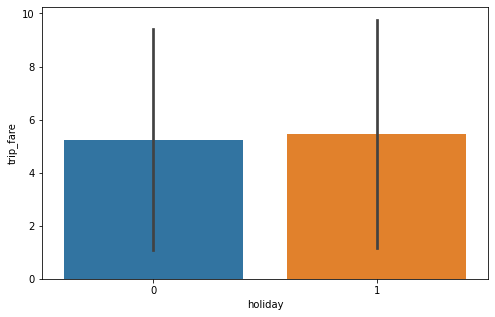

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='holiday',y='trip_fare', ci='sd', data=trip_calendar_passenger_city)

# 2. Find the average call time (the time in which a trip was requested) of the first time passengers make a trip. 


In [ ]:
trip_calendar_passenger_city['first_call_time'] = pd.to_datetime(trip_calendar_passenger_city['first_call_time'])

In [ ]:
trip_calendar_passenger_city['first_call_time_hour'] = trip_calendar_passenger_city['first_call_time'].dt.hour
trip_calendar_passenger_city['call_time_hour'] = trip_calendar_passenger_city['call_time'].dt.hour

trip_calendar_passenger_city

,id_trip,driver_id,passenger_id,city_id,call_time,finish_time,surge_rate,trip_distance,trip_fare,date,id_calendar,calendar_date,week_day,holiday,id_trip_calendar_passenger,first_call_time,id_city,name,first_call_time_hour,call_time_hour
0,48d284eb,e3e77255,c01d24da,43006,2019-09-22 02:06:34,2019-09-22 02:16:07,0.0,2.43,3.53,2019-09-22,47353,2019-09-22,Sunday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith,20,2
1,8bd39604,b199e84a,c01d24da,43006,2019-09-22 01:48:39,2019-09-22 02:00:38,0.0,2.22,1.80,2019-09-22,47353,2019-09-22,Sunday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith,20,1
2,b03cd256,bf367601,c01d24da,43006,2019-09-12 05:38:07,2019-09-12 05:46:14,0.1,2.85,4.03,2019-09-12,47343,2019-09-12,Thursday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith,20,5
3,b394dfb7,cb37f75b,c01d24da,43006,2019-09-20 02:28:14,2019-09-20 02:43:11,0.0,5.40,5.65,2019-09-20,47351,2019-09-20,Friday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith,20,2
4,5232ed7c,4bb1a12a,c01d24da,43006,2019-08-31 08:34:16,2019-08-31 09:00:52,0.0,2.26,3.50,2019-08-31,47331,2019-08-31,Saturday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith,20,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318352,448d215d,06185804,6b73f500,43050,2019-08-29 01:20:21,2019-08-29 01:52:58,0.0,4.08,5.89,2019-08-29,47329,2019-08-29,Thursday,0,6b73f500,2019-07-01 19:43:10,43050,Gondor,19,1
2318353,44e2ffea,6e026578,af737794,43050,2019-08-29 00:37:34,2019-08-29 00:51:59,0.0,2.90,4.43,2019-08-29,47329,2019-08-29,Thursday,0,af737794,2018-05-08 06:16:09,43050,Gondor,6,0
2318354,465654bf,d4da63ed,577a0f2c,43050,2019-08-29 00:20:15,2019-08-29 00:34:34,0.0,4.00,4.04,2019-08-29,47329,2019-08-29,Thursday,0,577a0f2c,2018-03-04 22:52:58,43050,Gondor,22,0
2318355,46ea4d4e,53de3b11,7f3321c1,43050,2019-08-29 02:20:33,2019-08-29 02:37:32,0.0,5.02,4.57,2019-08-29,47329,2019-08-29,Thursday,0,7f3321c1,2018-11-22 11:18:17,43050,Gondor,11,2


In [ ]:
grouped_call_time_hour = trip_calendar_passenger_city.groupby('id_trip_calendar_passenger').agg({'first_call_time_hour':'mean'})
grouped_call_time_hour

,first_call_time_hour
id_trip_calendar_passenger,
00000fab,20.0
0000149d,21.0
00002b66,21.0
00002bc7,11.0
0000332e,23.0
...,...
ffffc015,3.0
ffffc4f2,6.0
ffffcb5d,0.0


<Figure size 1440x1440 with 0 Axes>

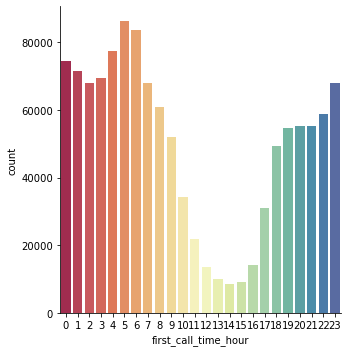

In [ ]:
plt.figure(figsize=(20,20))
x_labels = list(range(0,24))
g = sns.catplot(x='first_call_time_hour',kind='count', data=grouped_call_time_hour, palette='Spectral')
g.set(xticklabels=x_labels)

In [ ]:
as_percent = dict(round(trip_calendar_passenger_city['first_call_time_hour'].value_counts(normalize=True),3))
as_percent

{5: 0.073,
 6: 0.07,
 4: 0.065,
 0: 0.062,
 1: 0.059,
 3: 0.058,
 23: 0.057,
 2: 0.056,
 7: 0.056,
 8: 0.05,
 22: 0.049,
 19: 0.047,
 20: 0.046,
 21: 0.046,
 9: 0.043,
 18: 0.043,
 10: 0.029,
 17: 0.027,
 11: 0.018,
 16: 0.012,
 12: 0.011,
 13: 0.008,
 15: 0.007,
 14: 0.007}

In [ ]:
answer = list(as_percent.keys())[0]

In [ ]:
print('The hour with the most first calls is ' + str(answer)+'h AM')

The hour with the most first calls is 5h AM


BONUS

<Figure size 1440x1440 with 0 Axes>

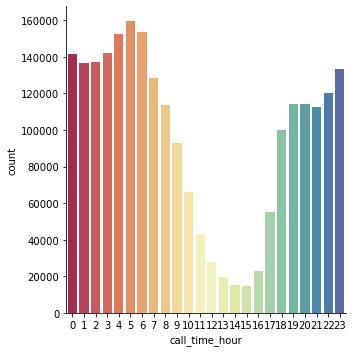

In [ ]:
plt.figure(figsize=(20,20))
sns.catplot(x='call_time_hour',kind='count', data=trip_calendar_passenger_city, palette='Spectral')

In [ ]:
as_percent_call_time = dict(round(trip_calendar_passenger_city['call_time_hour'].value_counts(normalize=True),3))
as_percent_call_time

{5: 0.069,
 6: 0.066,
 4: 0.066,
 3: 0.061,
 0: 0.061,
 2: 0.059,
 1: 0.059,
 23: 0.058,
 7: 0.055,
 22: 0.052,
 19: 0.049,
 20: 0.049,
 8: 0.049,
 21: 0.049,
 18: 0.043,
 9: 0.04,
 10: 0.028,
 17: 0.024,
 11: 0.019,
 12: 0.012,
 16: 0.01,
 13: 0.008,
 14: 0.007,
 15: 0.006}

# 3. Find the average number of trips per driver for every week day. 


In [ ]:
pivottable = pd.pivot_table(data=trip_calendar_passenger_city,
                            index='driver_id',
                            columns='week_day',
                            values='id_trip',
                            aggfunc='count',
                            fill_value=0,
                            margins=True,
                            sort=True)
cols = pivottable.columns.tolist()

In [ ]:
pivottable.reindex(columns= ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','All'])

week_day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,All
driver_id,,,,,,,,
00003225,0,1,0,0,0,0,0,1
00004bc7,0,1,0,0,0,0,0,1
0000a85b,0,0,1,3,0,1,1,6
00010001,5,13,10,10,7,8,2,55
0001dd02,0,1,0,2,3,5,0,11
...,...,...,...,...,...,...,...,...
fffe967b,0,0,0,1,0,0,0,1
fffec447,0,0,1,0,0,1,0,2
ffff20ba,0,0,1,0,1,1,2,5


# 4. Which day of the week drivers usually drive the most distance on average? 


In [ ]:
dow = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [ ]:
trip_dist_groupedby_weekday = trip_calendar_passenger_city.groupby('week_day').agg({'trip_distance':'mean'})
trip_dist_groupedby_weekday.reindex(dow)

,trip_distance
week_day,
Monday,6.485964
Tuesday,6.127666
Wednesday,6.056078
Thursday,6.089861
Friday,6.174418
Saturday,6.342677
Sunday,6.630458


<AxesSubplot:xlabel='week_day', ylabel='trip_distance'>

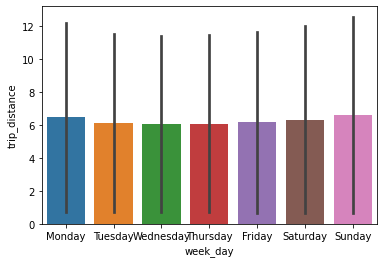

In [ ]:
sns.barplot(y='trip_distance', x='week_day', order=dow , ci='sd', data=trip_calendar_passenger_city)

# 5. What was the growth percentage of rides month over month? 


In [ ]:
trip_calendar_passenger_city.head()

,id_trip,driver_id,passenger_id,city_id,call_time,finish_time,surge_rate,trip_distance,trip_fare,date,id_calendar,calendar_date,week_day,holiday,id_trip_calendar_passenger,first_call_time,id_city,name,first_call_time_hour,call_time_hour
0,48d284eb,e3e77255,c01d24da,43006,2019-09-22 02:06:34,2019-09-22 02:16:07,0.0,2.43,3.53,2019-09-22,47353,2019-09-22,Sunday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith,20,2
1,8bd39604,b199e84a,c01d24da,43006,2019-09-22 01:48:39,2019-09-22 02:00:38,0.0,2.22,1.80,2019-09-22,47353,2019-09-22,Sunday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith,20,1
2,b03cd256,bf367601,c01d24da,43006,2019-09-12 05:38:07,2019-09-12 05:46:14,0.1,2.85,4.03,2019-09-12,47343,2019-09-12,Thursday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith,20,5
3,b394dfb7,cb37f75b,c01d24da,43006,2019-09-20 02:28:14,2019-09-20 02:43:11,0.0,5.40,5.65,2019-09-20,47351,2019-09-20,Friday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith,20,2
4,5232ed7c,4bb1a12a,c01d24da,43006,2019-08-31 08:34:16,2019-08-31 09:00:52,0.0,2.26,3.50,2019-08-31,47331,2019-08-31,Saturday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith,20,8


In [ ]:
trip_calendar_passenger_city['date'] = pd.to_datetime(trip_calendar_passenger_city['date'])
trip_calendar_passenger_city['month_year'] = trip_calendar_passenger_city['date'].dt.to_period('M')

In [ ]:
rides_groupedby_month = trip_calendar_passenger_city.groupby('month_year').agg({'id_trip':'count'})
rides_groupedby_month

,id_trip
month_year,
2019-05,439732
2019-06,479822
2019-07,479476
2019-08,515401
2019-09,403926


In [ ]:
var = []
indexer = 0

for lab , row in rides_groupedby_month.iterrows() :
    if indexer > 0:
        var.append((rides_groupedby_month['id_trip'][indexer] / rides_groupedby_month['id_trip'][indexer-1] - 1)*100)
    else :
        var.append(0)
    indexer += 1

In [ ]:
var

[0,
 9.116916667424713,
 -0.07211007415249826,
 7.492554371855942,
 -21.628790010108634]

In [ ]:
rides_groupedby_month['variation'] = var
rides_groupedby_month

,id_trip,variation
month_year,,
2019-05,439732,0.000000
2019-06,479822,9.116917
2019-07,479476,-0.072110
2019-08,515401,7.492554
2019-09,403926,-21.628790


In [ ]:
rides_groupedby_month['month_year_'] = rides_groupedby_month.index.astype(str)
rides_groupedby_month

,id_trip,variation,month_year_
month_year,,,
2019-05,439732,0.000000,2019-05
2019-06,479822,9.116917,2019-06
2019-07,479476,-0.072110,2019-07
2019-08,515401,7.492554,2019-08
2019-09,403926,-21.628790,2019-09


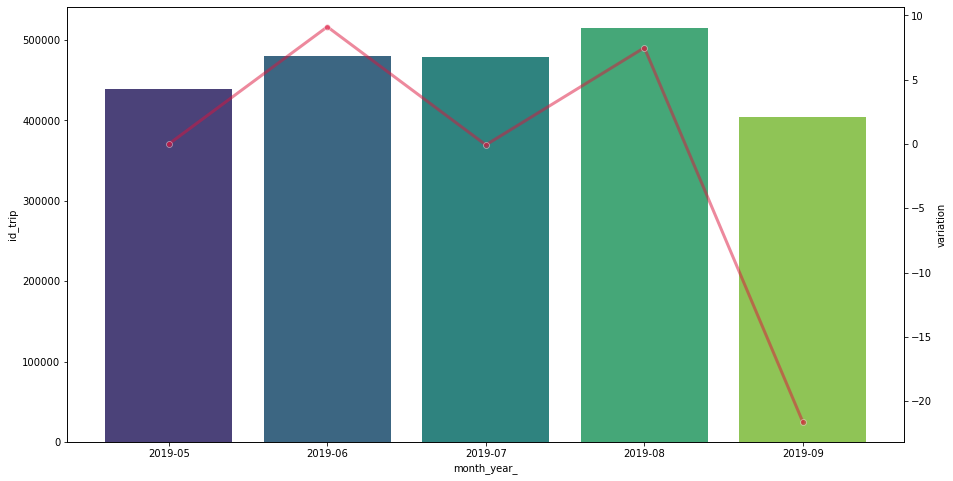

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='month_year_', y='id_trip', palette='viridis', data=rides_groupedby_month)

ax2 = ax.twinx()
sns.lineplot(x='month_year_', y='variation', data=rides_groupedby_month, marker='o', color='crimson', lw=3,alpha=0.5,ax=ax2)

plt.show()

# 6. Optional. List the top 5 drivers per number of trips in the top 5 largest cities. 


In [ ]:
city.shape

(10, 2)

In [ ]:
tripsby_city = trip_calendar_passenger_city.groupby(['name', 'city_id']).agg({'id_trip':'count'}).sort_values('id_trip', ascending=False)

In [ ]:
tripsby_city

,,id_trip
name,city_id,
The Shire,43278,489454
Minas Tirith,43006,418895
Rivendell,43179,388464
Rohan,43116,365397
Isengard,43020,337648
Gondor,43050,318499


In [ ]:
top_cities_names = list(tripsby_city.index.get_level_values(0))
top_cities_id = list(tripsby_city.index.get_level_values(1))

In [ ]:
top5cities_names = top_cities_names[0:5]
top5cities_names

['The Shire', 'Minas Tirith', 'Rivendell', 'Rohan', 'Isengard']

In [ ]:
top5cities_id = top_cities_id[0:5]
top5cities_id

[43278, 43006, 43179, 43116, 43020]

I'll assume the cities with more trips are the biggests cities

In [ ]:
sliced_df = trip_calendar_passenger_city[trip_calendar_passenger_city['city_id'].isin(top5cities_id)]
sliced_df

,id_trip,driver_id,passenger_id,city_id,call_time,finish_time,surge_rate,trip_distance,trip_fare,date,...,calendar_date,week_day,holiday,id_trip_calendar_passenger,first_call_time,id_city,name,first_call_time_hour,call_time_hour,month_year
0,48d284eb,e3e77255,c01d24da,43006,2019-09-22 02:06:34,2019-09-22 02:16:07,0.0,2.43,3.53,2019-09-22,...,2019-09-22,Sunday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith,20,2,2019-09
1,8bd39604,b199e84a,c01d24da,43006,2019-09-22 01:48:39,2019-09-22 02:00:38,0.0,2.22,1.80,2019-09-22,...,2019-09-22,Sunday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith,20,1,2019-09
2,b03cd256,bf367601,c01d24da,43006,2019-09-12 05:38:07,2019-09-12 05:46:14,0.1,2.85,4.03,2019-09-12,...,2019-09-12,Thursday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith,20,5,2019-09
3,b394dfb7,cb37f75b,c01d24da,43006,2019-09-20 02:28:14,2019-09-20 02:43:11,0.0,5.40,5.65,2019-09-20,...,2019-09-20,Friday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith,20,2,2019-09
4,5232ed7c,4bb1a12a,c01d24da,43006,2019-08-31 08:34:16,2019-08-31 09:00:52,0.0,2.26,3.50,2019-08-31,...,2019-08-31,Saturday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith,20,8,2019-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999853,44560157,6f150724,b22d228f,43278,2019-08-29 22:52:59,2019-08-29 23:04:21,0.0,2.96,2.52,2019-08-29,...,2019-08-29,Thursday,0,b22d228f,2018-12-15 18:21:01,43278,The Shire,18,22,2019-08
1999854,45387049,27ee4e52,97d98448,43278,2019-08-29 23:04:27,2019-08-29 23:18:33,0.0,5.38,5.99,2019-08-29,...,2019-08-29,Thursday,0,97d98448,2019-08-29 22:14:31,43278,The Shire,22,23,2019-08
1999855,4622c3d6,d0ecf865,fd561b98,43278,2019-08-29 21:07:52,2019-08-29 21:21:40,0.0,3.63,3.22,2019-08-29,...,2019-08-29,Thursday,0,fd561b98,2018-08-11 19:56:39,43278,The Shire,19,21,2019-08
1999856,4645208f,c06744cc,bf0aa6cd,43278,2019-08-29 04:36:04,2019-08-29 04:45:24,0.0,1.80,2.56,2019-08-29,...,2019-08-29,Thursday,0,bf0aa6cd,2019-08-07 06:32:17,43278,The Shire,6,4,2019-08


In [ ]:
sliced_df['city_id'].unique()

array([43006, 43179, 43020, 43116, 43278])

In [ ]:
drivers_trips = sliced_df.groupby('driver_id').agg({'id_trip':'count'}).sort_values('id_trip', ascending=False)
drivers_trips

,id_trip
driver_id,
e38a1cc4,197
0729b626,179
28925239,172
5b0e66b0,161
66e525c0,156
...,...
e79d90cf,1
7e746f41,1
7e6bbcab,1


In [ ]:
top5_drivers = dict(drivers_trips.iloc[0:5,0])
top5_drivers

{'e38a1cc4': 197,
 '0729b626': 179,
 '28925239': 172,
 '5b0e66b0': 161,
 '66e525c0': 156}

In [ ]:
print('The top 5 drivers of the 5 biggest cities are '+ str(list(top5_drivers.keys())) )

The top 5 drivers of the 5 biggest cities are ['e38a1cc4', '0729b626', '28925239', '5b0e66b0', '66e525c0']


# Second understanding of the question 6

------------------------------------------------------------------------------------------------

In [ ]:
city_drivers = sliced_df.groupby(['city_id','driver_id']).agg({'id_trip':'count'}).reset_index()
city_drivers

,city_id,driver_id,id_trip
0,43006,0001ff52,6
1,43006,00047a47,13
2,43006,000c3977,34
3,43006,000c4cae,10
4,43006,0012253c,3
...,...,...,...
128685,43278,fff523ba,3
128686,43278,fff737f7,8
128687,43278,fffabf37,4
128688,43278,ffff20ba,5


In [ ]:
sorteddf = city_drivers.groupby(['city_id']).apply(lambda x: x.sort_values(['id_trip'], ascending=False).reset_index(drop=True))
sorteddf.head(15)

city_id driver_id  id_trip
city_id                               
43006   0     43006  e38a1cc4      197
        1     43006  0729b626      153
        2     43006  ae160405      144
        3     43006  6294c442      143
        4     43006  db9f74db      143
        5     43006  44aff567      137
        6     43006  73c6e414      137
        7     43006  ad0c09ad      134
        8     43006  24998dd3      134
        9     43006  06cade4b      134
        10    43006  52144046      130
        11    43006  f841c58d      130
        12    43006  fff32023      129
        13    43006  51e6b79c      128
        14    43006  c658c176      128

In [ ]:
sorteddf = sorteddf.reset_index(drop=True)

In [ ]:
top5dc = sorteddf.groupby('city_id').head(5)

In [ ]:
top5dc.shape

(25, 3)

In [ ]:
print(top5dc)

       city_id driver_id  id_trip
0        43006  e38a1cc4      197
1        43006  0729b626      153
2        43006  ae160405      144
3        43006  6294c442      143
4        43006  db9f74db      143
23985    43020  957ca30b      148
23986    43020  ee25c3b5      139
23987    43020  7d0c4185      139
23988    43020  934bae83      136
23989    43020  683bbf62      134
48824    43116  28925239      172
48825    43116  b4dde07c      152
48826    43116  0d3159ba      148
48827    43116  5f17a268      146
48828    43116  f343c362      145
69909    43179  a947550b      143
69910    43179  c5d1405e      142
69911    43179  5cfeb4fa      138
69912    43179  aeafa773      130
69913    43179  df233c3c      129
98657    43278  5b0e66b0      161
98658    43278  66e525c0      156
98659    43278  7405b635      155
98660    43278  2922568d      151
98661    43278  0f2da8f1      146


In [ ]:
top25 = list(top5dc['driver_id'])

In [ ]:
print('The top 5 drivers of the five biggest cities are: '+str(top25))

The top 5 drivers of the five biggest cities are: ['e38a1cc4', '0729b626', 'ae160405', '6294c442', 'db9f74db', '957ca30b', 'ee25c3b5', '7d0c4185', '934bae83', '683bbf62', '28925239', 'b4dde07c', '0d3159ba', '5f17a268', 'f343c362', 'a947550b', 'c5d1405e', '5cfeb4fa', 'aeafa773', 'df233c3c', '5b0e66b0', '66e525c0', '7405b635', '2922568d', '0f2da8f1']


# Part 2 Analytical

# 1. Let's say it's 2019-09-23 and a new Operations manager for The Shire was just hired. She has 5 minutes during the Ops weekly meeting to present an overview of the business in the city, and since she's just arrived, she asked your help to do it. What would you prepare for this 5 minutes presentation? Please provide 1-2 slides with your idea. 

In [ ]:
trip_calendar_passenger_city.head(1)

,id_trip,driver_id,passenger_id,city_id,call_time,finish_time,surge_rate,trip_distance,trip_fare,date,...,calendar_date,week_day,holiday,id_trip_calendar_passenger,first_call_time,id_city,name,first_call_time_hour,call_time_hour,month_year
0,48d284eb,e3e77255,c01d24da,43006,2019-09-22 02:06:34,2019-09-22 02:16:07,0.0,2.43,3.53,2019-09-22,...,2019-09-22,Sunday,0,c01d24da,2018-09-22 20:04:43,43006,Minas Tirith,20,2,2019-09


In [ ]:
table_pivot = trip_calendar_passenger_city.pivot_table(index='name',
                                         values=['surge_rate','trip_distance','trip_fare'],
                                         aggfunc=[np.max, np.mean,np.min])
table_pivot.rename(columns={'amax':'Max','mean':'Mean','amin':'Min','surge_rate':'Surge Rate','trip_distance':'Trip Distance','trip_fare':'Trip Fare'},inplace=True)
table_pivot

Max                               Mean                \
             Surge Rate Trip Distance Trip Fare Surge Rate Trip Distance   
name                                                                       
Gondor              2.5        217.24    223.86   0.055481      5.033415   
Isengard            3.2        204.66    167.77   0.036011      7.660828   
Minas Tirith        4.0        202.11    237.66   0.034939      6.521810   
Rivendell           4.0        244.82    274.78   0.070741      6.875432   
Rohan               4.0        296.10    233.61   0.059538      6.111380   
The Shire           4.0        202.74   1234.32   0.022856      5.619366   

                              Min                          
             Trip Fare Surge Rate Trip Distance Trip Fare  
name                                                       
Gondor        5.136079       -1.0          -0.5      0.00  
Isengard      5.553150       -1.0          -0.5      0.01  
Minas Tirith  4.974044       -1.0          -0.5      0.00  
Rivendell     5.671999       -1.0          -0.5      0.00  
Rohan         5.278823       -1.0          -0.5      0.00  
The Shire     4.998631       -1.0          -0.5      0.00

In [ ]:
grouped = trip_calendar_passenger_city.groupby('name').agg({'id_trip':'nunique','driver_id':'nunique','passenger_id':'nunique'})
grouped.rename(columns={'id_trip':'Total of trips','driver_id':'Total of drivers','passenger_id':'Total of customers'})

,Total of trips,Total of drivers,Total of customers
name,,,
Gondor,318499,17263,162989
Isengard,337648,24839,177288
Minas Tirith,418895,23985,203147
Rivendell,388464,28748,218389
Rohan,365397,21085,195425
The Shire,489454,30033,243792


In [ ]:
tripsby_city = trip_calendar_passenger_city.groupby(['month_year','name']).agg({'id_trip':'count'}).reset_index(drop=False)
tripsby_city['month_year'] = tripsby_city['month_year'].astype(str)
tripsby_city

,month_year,name,id_trip
0,2019-05,Gondor,57952
1,2019-05,Isengard,66520
2,2019-05,Minas Tirith,75630
3,2019-05,Rivendell,71330
4,2019-05,Rohan,66152
5,2019-05,The Shire,102148
6,2019-06,Gondor,69065
7,2019-06,Isengard,67562
8,2019-06,Minas Tirith,86309
9,2019-06,Rivendell,77223


Text(0.5, 1.0, 'Trips by month')

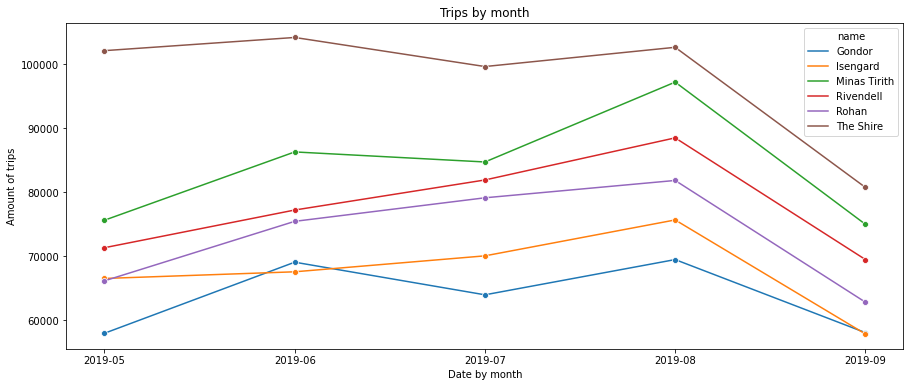

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x='month_year',y='id_trip', hue='name',marker='o', data=tripsby_city)
plt.xlabel('Date by month')
plt.ylabel('Amount of trips')
plt.title('Trips by month')


# 2. She also mentioned she has a budget to invest in promoting the business. What kind of metrics and performance indicators would you use in order to help her decide if she should invest it into the passenger side or the driver side? Extra point if you provide data-backed recommendations. 


In [ ]:
grouped2 = trip_calendar_passenger_city.groupby('name').agg({'id_trip':'nunique','driver_id':'nunique','passenger_id':'nunique','trip_distance':'mean'})
grouped2 = grouped2.rename(columns={'id_trip':'Total of trips','driver_id':'Total of drivers','passenger_id':'Total of customers','trip_distance':'Mean of distance'})
grouped2

,Total of trips,Total of drivers,Total of customers,Mean of distance
name,,,,
Gondor,318499,17263,162989,5.033415
Isengard,337648,24839,177288,7.660828
Minas Tirith,418895,23985,203147,6.521810
Rivendell,388464,28748,218389,6.875432
Rohan,365397,21085,195425,6.111380
The Shire,489454,30033,243792,5.619366


In [ ]:
grouped3 = grouped2

In [ ]:
grouped3['trips_by_drivers'] = grouped3['id_trip'] / grouped3['driver_id']
grouped3['trips_by_passengers'] = grouped3['id_trip'] / grouped3['passenger_id']


In [ ]:
grouped3 = grouped3.rename(columns={'id_trip':'Total of trips','driver_id':'Total of drivers','passenger_id':'Total of customers','trip_distance':'Mean of distance','trips_by_drivers':'Trips by driver','trips_by_passengers':'Trips by passenger'})
grouped3

,Total of trips,Total of drivers,Total of customers,Mean of distance,Trips by driver,Trips by passenger
name,,,,,,
Gondor,318499,17263,162989,5.033415,18.449806,1.954113
Isengard,337648,24839,177288,7.660828,13.593462,1.904517
Minas Tirith,418895,23985,203147,6.521810,17.464874,2.062029
Rivendell,388464,28748,218389,6.875432,13.512731,1.778771
Rohan,365397,21085,195425,6.111380,17.329713,1.869756
The Shire,489454,30033,243792,5.619366,16.297206,2.007670


In [ ]:
conn.close

In [ ]:
cur.close()